In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/amalab182/property-salesmelbourne-city/data")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedosamaalishah092
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/amalab182/property-salesmelbourne-city


100%|██████████| 589k/589k [00:00<00:00, 63.1MB/s]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv('/content/property-salesmelbourne-city/Property Sales of Melbourne City.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.shape

(18396, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18396 non-null  object 
 1   Address        18396 non-null  object 
 2   Rooms          18396 non-null  int64  
 3   Type           18396 non-null  object 
 4   Price          18396 non-null  int64  
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  CouncilArea    12233 non-null  object 
 17  Lattitude      15064 non-null  float64
 18  Longti

In [8]:
df.describe(percentiles=[0, .25, .30, .50, .75, .80, 1]).T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,0%,25%,30%,50%,75%,80%,100%,max
Rooms,18396.000000,2.935040,0.958202,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,12.000000,12.000000
Price,18396.000000,1056697.460915,641921.666710,85000.000000,85000.000000,633000.000000,680000.000000,880000.000000,1302000.000000,1420000.000000,9000000.000000,9000000.000000
Distance,18395.000000,10.389986,6.009050,0.000000,0.000000,6.300000,7.000000,9.700000,13.300000,13.900000,48.100000,48.100000
Postcode,18395.000000,3107.140147,95.000995,3000.000000,3000.000000,3046.000000,3056.000000,3085.000000,3149.000000,3165.000000,3978.000000,3978.000000
Bedroom2,14927.000000,2.913043,0.964641,0.000000,0.000000,2.000000,2.000000,3.000000,3.000000,4.000000,20.000000,20.000000
Bathroom,14925.000000,1.538492,0.689311,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,8.000000,8.000000
Car,14820.000000,1.615520,0.955916,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,10.000000,10.000000
Landsize,13603.000000,558.116371,3987.326586,0.000000,0.000000,176.500000,215.000000,440.000000,651.000000,690.000000,433014.000000,433014.000000
BuildingArea,7762.000000,151.220219,519.188596,0.000000,0.000000,93.000000,100.000000,126.000000,174.000000,189.000000,44515.000000,44515.000000
YearBuilt,8958.000000,1965.879996,37.013261,1196.000000,1196.000000,1950.000000,1950.000000,1970.000000,2000.000000,2003.000000,2018.000000,2018.000000


<Axes: xlabel='Price', ylabel='Density'>

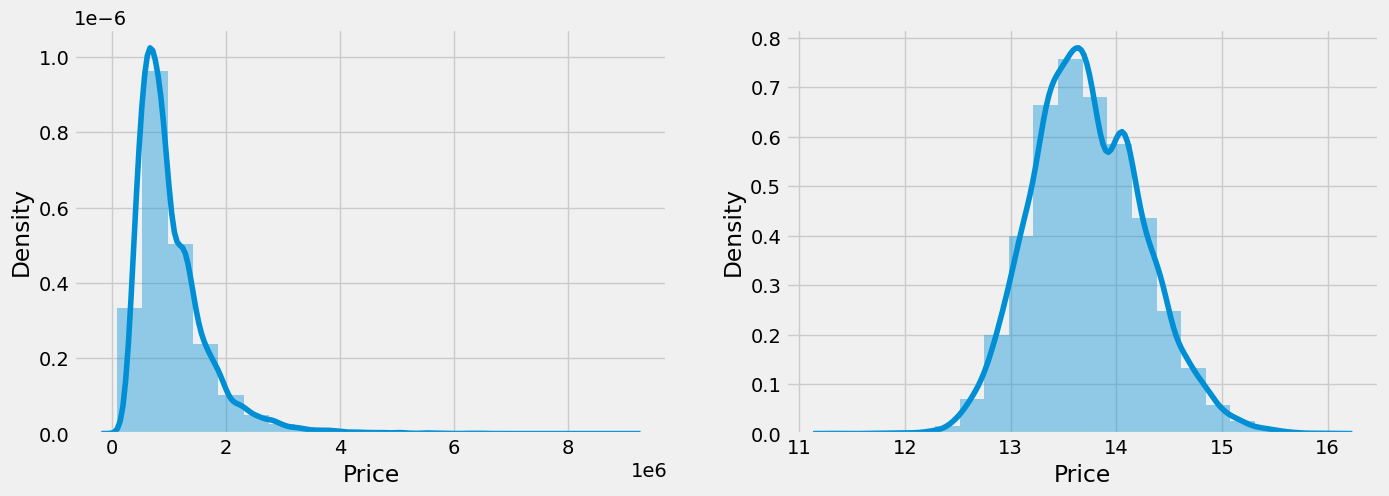

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Price'],bins=20)
plt.subplot(1,2,2)
sns.distplot(np.log(df['Price']),bins=20)

In [10]:
null = pd.DataFrame({'Null Values':df.isnull().sum(),'Percentage null Values':df.isnull().sum()*100/len(df)})
null = null.sort_values('Percentage null Values',ascending=False)
null

,Null Values,Percentage null Values
BuildingArea,10634,57.806045
YearBuilt,9438,51.304631
CouncilArea,6163,33.501848
Landsize,4793,26.054577
Car,3576,19.439008
Bathroom,3471,18.868232
Bedroom2,3469,18.857360
Longtitude,3332,18.112633
Lattitude,3332,18.112633
Regionname,1,0.005436


In [11]:
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].median())
df.dropna(inplace=True)

In [13]:
#df['Date'] = pd.to_datetime(df['Date'])
# Change the date format to "%d/%m/%Y"
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['BuildingAge'] = datetime.now().year-df['YearBuilt']
df['TotalRooms'] = df['Rooms']+df['Bedroom2']+df['Bathroom']

df['Type'] = df['Type'].map({'h':'house','t':'townhouse','u':'apartment'})
df['Method'] = df['Method'].map({'S':'property sold','SP':'property sold prior','PI':'property passed in',
                                 'VB':'vendor bid','SA':'sold after auction'})

# deop unnecessary columns
df.drop(['Address','Date','Postcode','YearBuilt'],axis=1,inplace=True)

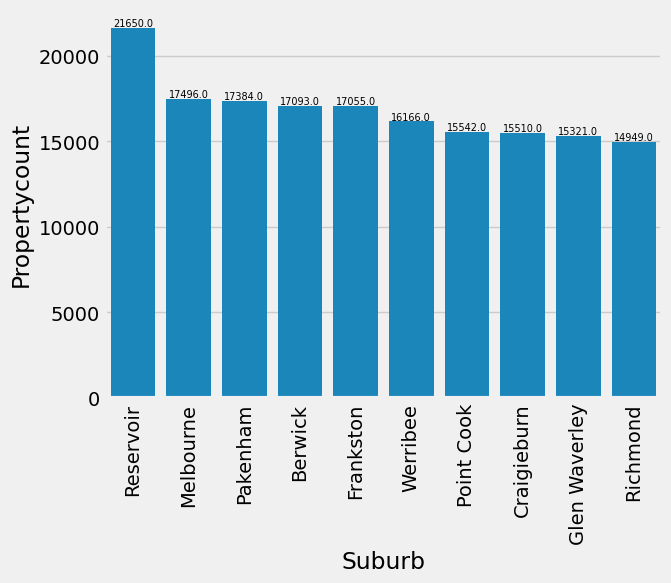

In [14]:
sub_prop = df.groupby('Suburb')['Propertycount'].mean().reset_index().sort_values('Propertycount',ascending=False).reset_index(drop=True).head(10)
g = sns.barplot(data=sub_prop,x='Suburb',y='Propertycount')
for v in sub_prop.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Propertycount+100,s=str(v.Propertycount), size=7, ha="center")
plt.xticks(rotation=90)
plt.show()

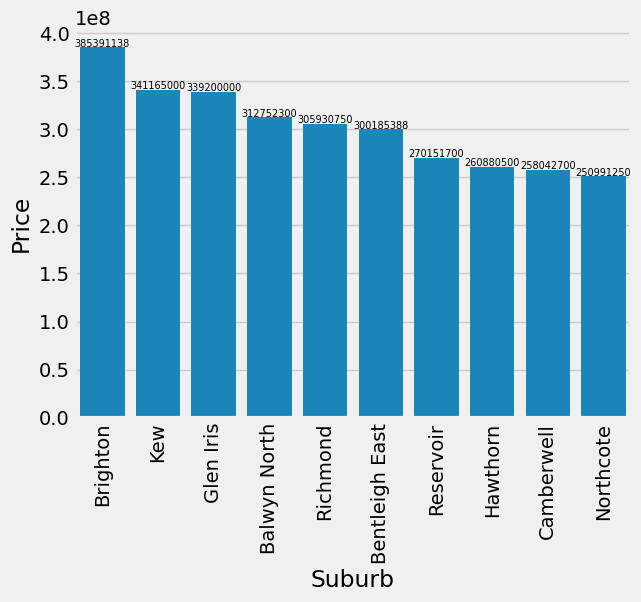

In [15]:
sub_price = df.groupby('Suburb')['Price'].sum().reset_index().sort_values('Price',ascending=False).reset_index(drop=True).head(10)
g = sns.barplot(data=sub_price,x='Suburb',y='Price')
for v in sub_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Price+1e6,s=str(v.Price), size=7, ha="center")
plt.xticks(rotation=90)
plt.show()

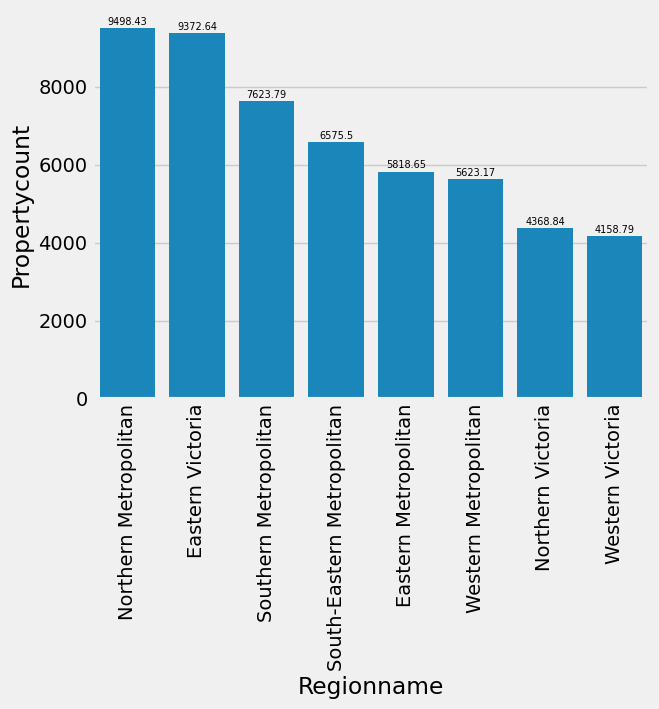

In [16]:
reg_prop = round(df.groupby('Regionname')['Propertycount'].mean(),2)
reg_prop = reg_prop.reset_index().sort_values('Propertycount',ascending=False).reset_index(drop=True)
g = sns.barplot(data=reg_prop,x='Regionname',y='Propertycount')
for v in reg_prop.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Propertycount+100,s=str(v.Propertycount), size=7, ha="center")
plt.xticks(rotation=90)
plt.show()

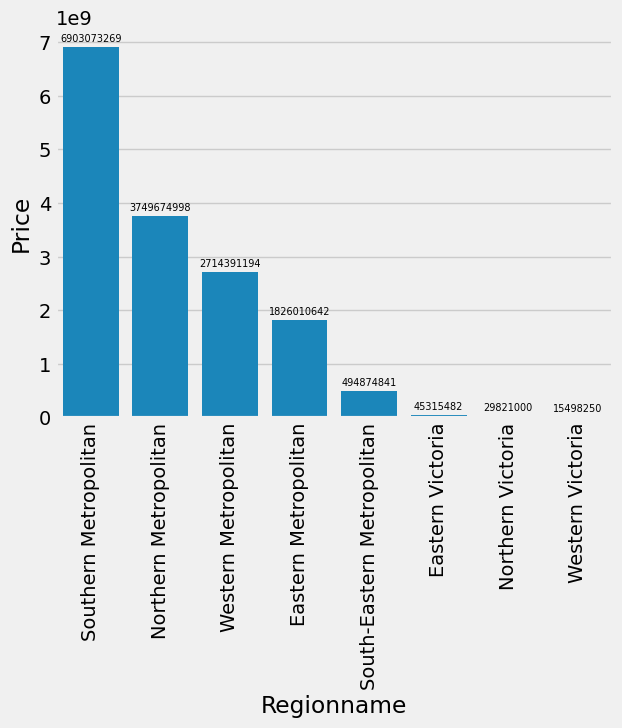

In [17]:
reg_price = df.groupby('Regionname')['Price'].sum().reset_index().sort_values('Price',ascending=False).reset_index(drop=True).head(10)
g = sns.barplot(data=reg_price,x='Regionname',y='Price')
for v in reg_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Price+1e8,s=str(v.Price), size=7, ha="center")
plt.xticks(rotation=90)
plt.show()

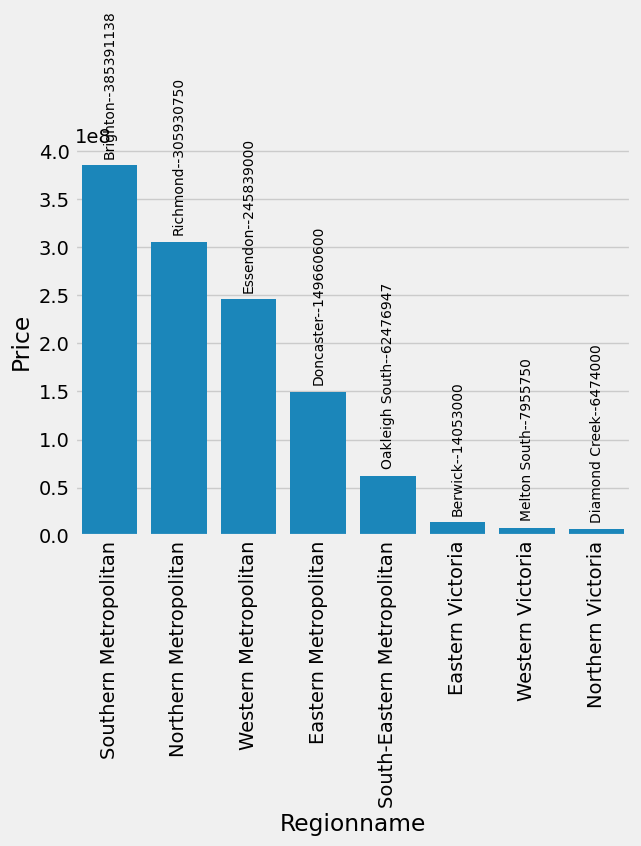

In [18]:
reg_sub_price = df.groupby(['Regionname','Suburb'])['Price'].sum().reset_index().sort_values('Price',ascending=False).groupby('Regionname').head(1).reset_index(drop=True)
g = sns.barplot(data=reg_sub_price,x='Regionname',y='Price')
model = reg_sub_price['Suburb']
for v in reg_sub_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Price+1e7,s=str(v.Suburb + '--' +str(round(v.Price, 2))), size=10, rotation=90, ha="center")
plt.xticks(rotation=90)
plt.show()

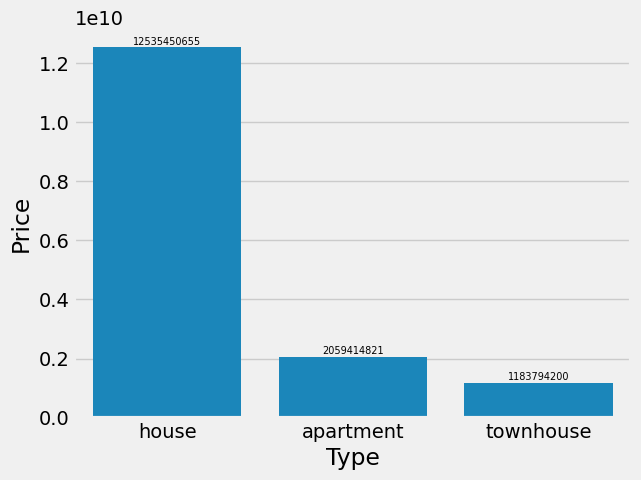

In [23]:
type_price = df.groupby('Type')['Price'].sum().reset_index().sort_values('Price',ascending=False).reset_index(drop=True)
g = sns.barplot(data=type_price,x='Type',y='Price')
for v in type_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Price+1e8,s=str(v.Price), size=7, ha="center")
plt.show()

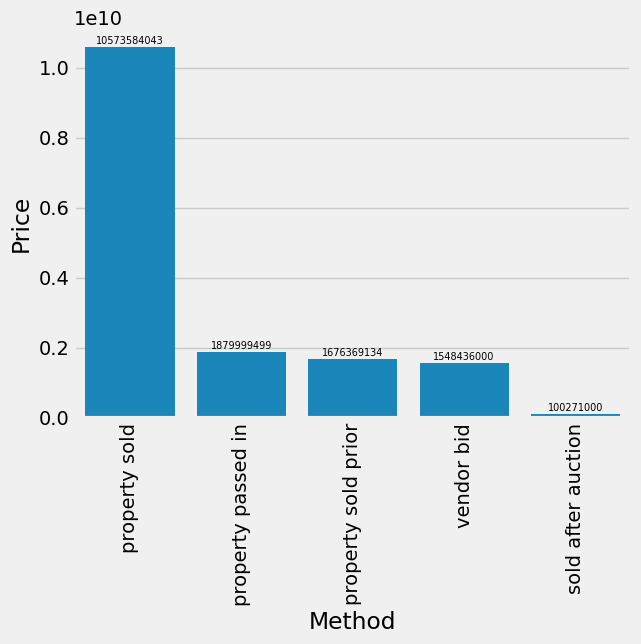

In [25]:
methode_price = df.groupby('Method')['Price'].sum().reset_index().sort_values('Price',ascending=False).reset_index(drop=True)
g = sns.barplot(data=methode_price,x='Method',y='Price')
for v in methode_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Price+1e8,s=str(v.Price), size=7, ha="center")
plt.xticks(rotation=90)
plt.show()

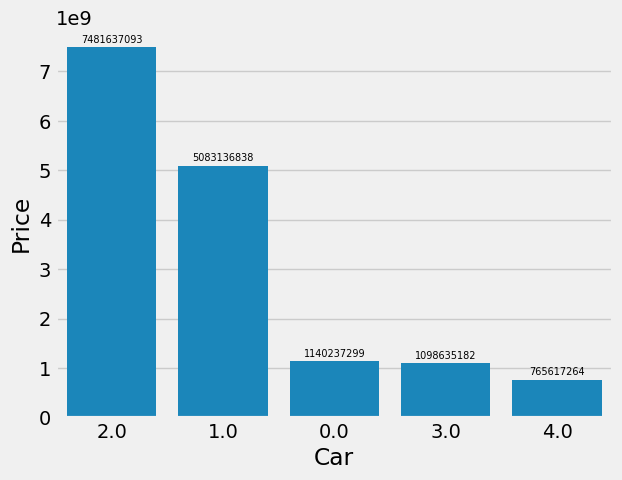

In [28]:
car_price = df.groupby('Car')['Price'].sum().reset_index().sort_values('Price',ascending=False).reset_index(drop=True).head()
g = sns.barplot(data=car_price,x='Car',y='Price',order=car_price.Car)
for v in car_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Price+1e8,s=str(v.Price), size=7, ha="center")
plt.show()

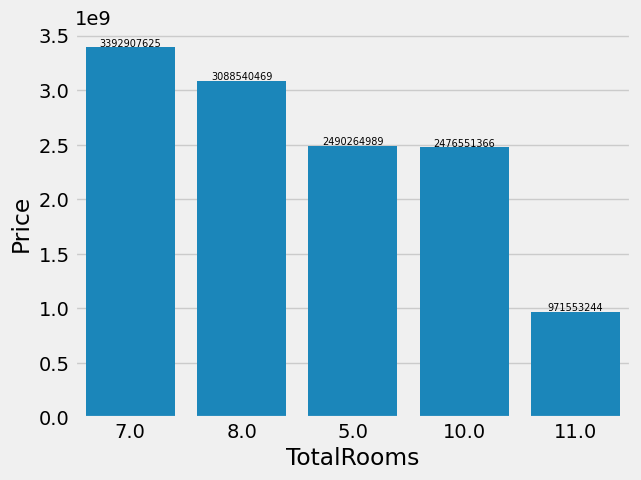

In [30]:
room_price = df.groupby('TotalRooms')['Price'].sum().reset_index().sort_values('Price',ascending=False).reset_index(drop=True).head()
g = sns.barplot(data=room_price,x='TotalRooms',y='Price',order=room_price.TotalRooms)
for v in room_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Price+1e7,s=str(v.Price), size=7, ha="center")
plt.show()

<Axes: xlabel='BuildingArea', ylabel='Price'>

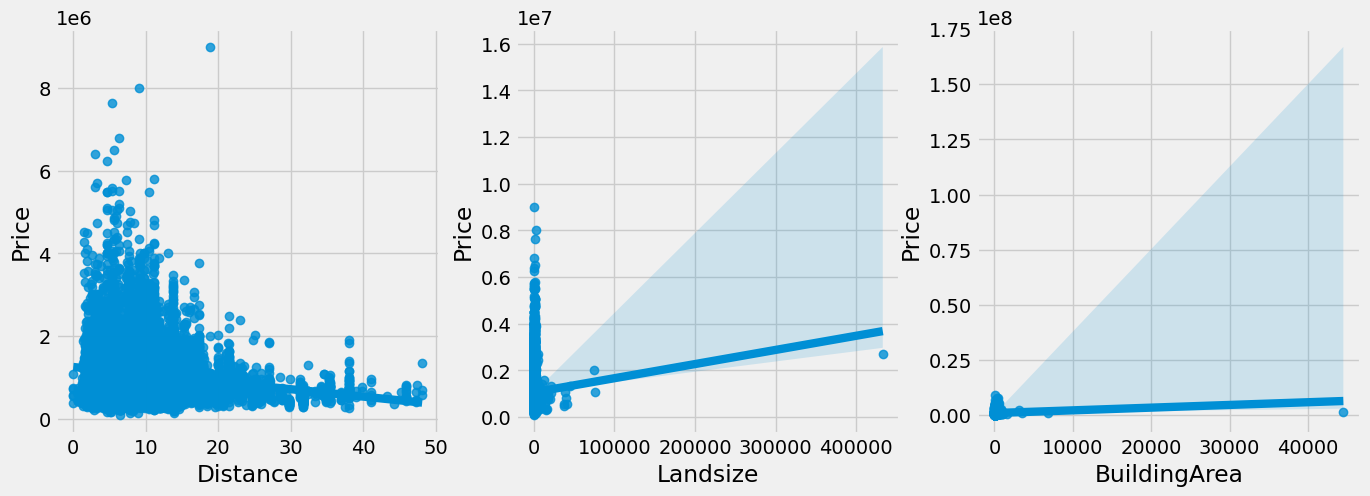

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.regplot(data=df,x='Distance',y='Price')
plt.subplot(1,3,2)
sns.regplot(data=df,x='Landsize',y='Price')
plt.subplot(1,3,3)
sns.regplot(data=df,x='BuildingArea',y='Price')

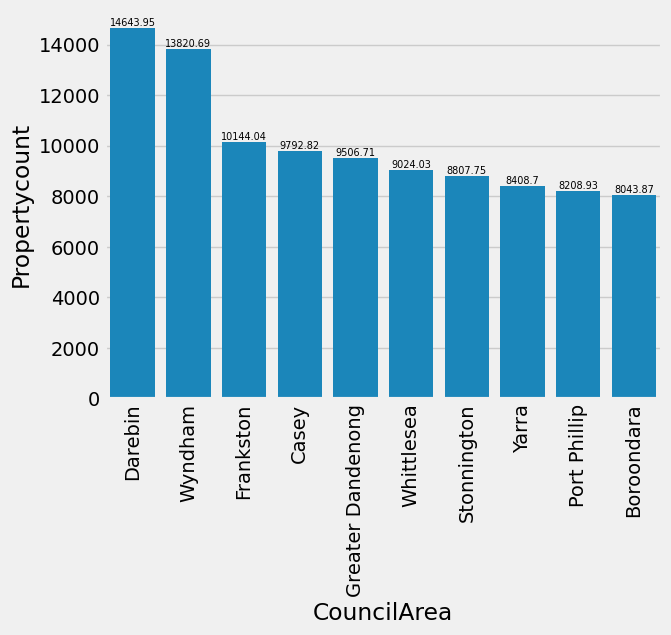

In [34]:
council_propcount = round(df.groupby('CouncilArea')['Propertycount'].mean().reset_index(),2)
council_propcount = council_propcount.sort_values('Propertycount',ascending=False).reset_index(drop=True).head(10)
g = sns.barplot(data=council_propcount,x='CouncilArea',y='Propertycount')
for v in council_propcount.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Propertycount+100,s=str(v.Propertycount), size=7, ha="center")
plt.xticks(rotation=90)
plt.show()

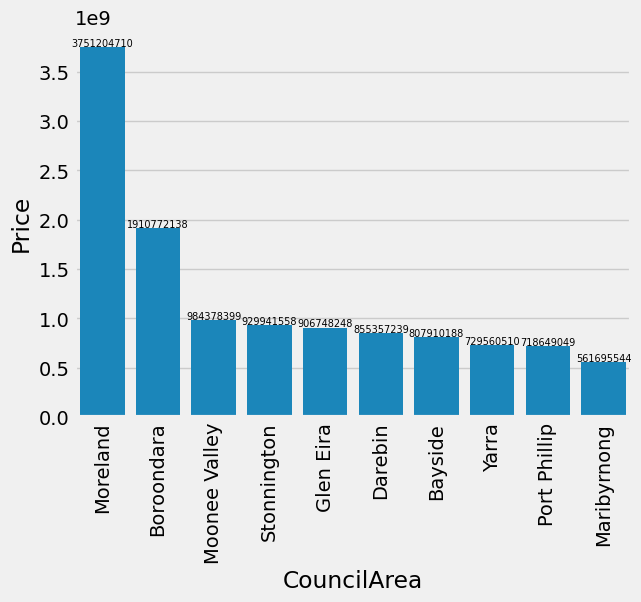

In [36]:
council_price = df.groupby('CouncilArea')['Price'].sum().reset_index().sort_values('Price',ascending=False).reset_index(drop=True).head(10)
g = sns.barplot(data=council_price,x='CouncilArea',y='Price')
for v in council_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.Price+1e7,s=str(v.Price), size=7, ha="center")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

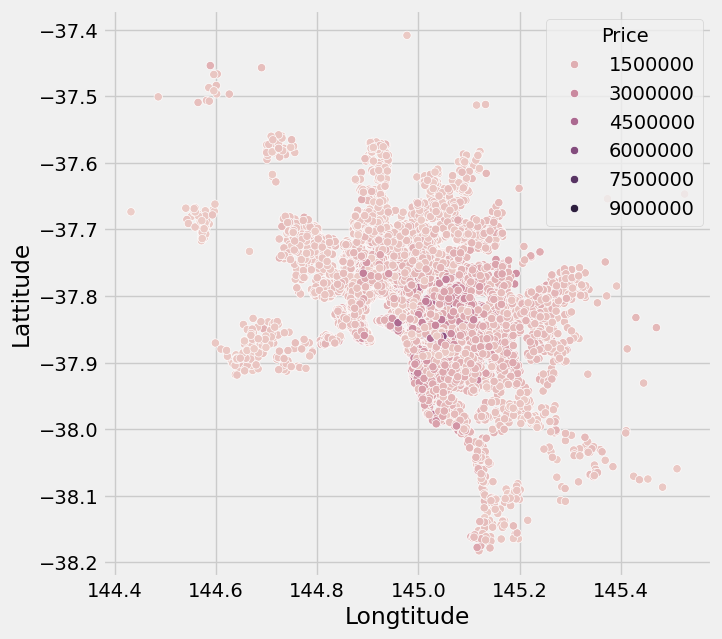

In [37]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Longtitude',y='Lattitude',data=df,hue='Price')

In [38]:
df.sort_values('Price',ascending=False).head(20)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,BuildingAge,TotalRooms
15270,Mulgrave,3,house,9000000,property passed in,Hall,18.8,3.0,1.0,1.0,744.0,117.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,2017,7,64.0,7.0
9754,Canterbury,5,house,8000000,vendor bid,Sotheby's,9.0,5.0,5.0,4.0,2079.0,464.3,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0,2017,5,144.0,15.0
12219,Hawthorn,4,house,7650000,property sold,Abercromby's,5.3,4.0,2.0,4.0,1690.0,284.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0,2017,6,161.0,10.0
16308,Armadale,4,house,6800000,vendor bid,Marshall,6.3,4.0,2.0,2.0,440.0,126.0,Moreland,-37.85801,145.01383,Southern Metropolitan,4836.0,2017,9,54.0,10.0
4599,Kew,6,house,6500000,property sold,Jellis,5.6,6.0,6.0,3.0,1334.0,365.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0,2016,8,134.0,18.0
16113,Middle Park,5,house,6400000,property sold,Marshall,3.0,5.0,2.0,1.0,553.0,308.0,Moreland,-37.84908,144.95753,Southern Metropolitan,2019.0,2017,9,104.0,12.0
8143,Toorak,3,house,6250000,property sold,Kay,4.6,3.0,3.0,2.0,564.0,342.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217.0,2016,10,24.0,9.0
9589,Brighton,5,house,5800000,property passed in,Castran,11.2,5.0,4.0,4.0,1276.0,126.0,Bayside,-37.91640,144.99740,Southern Metropolitan,10579.0,2017,4,144.0,14.0
18073,Glen Iris,5,house,5770000,property sold,Marshall,7.3,5.0,3.0,2.0,440.0,638.0,Moreland,-37.86048,145.04870,Southern Metropolitan,10412.0,2017,8,13.0,13.0
7184,South Yarra,4,house,5700000,property sold,Castran,3.3,4.0,2.0,0.0,292.0,272.0,Stonnington,-37.83770,144.98940,Southern Metropolitan,14887.0,2016,11,144.0,10.0


In [39]:
len(df)*(0.01)

147.98

In [40]:
non_top_1_perc = df.sort_values('Price',ascending=False).iloc[148:]

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

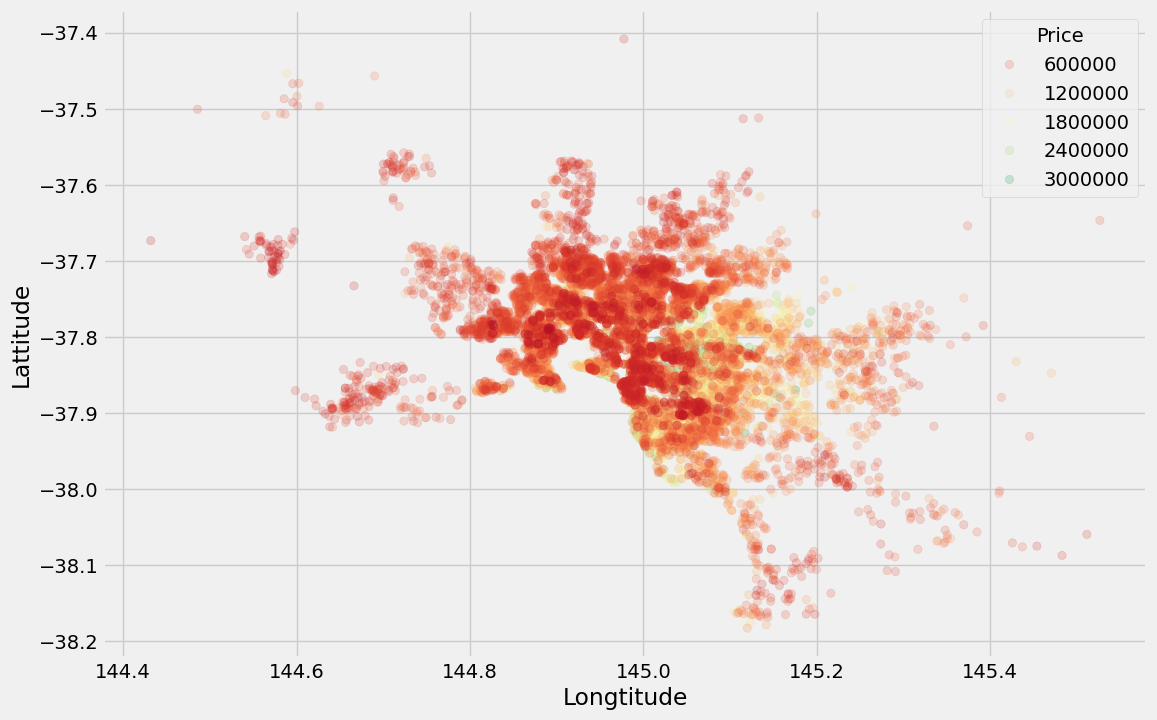

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Longtitude',y='Lattitude',
                data=non_top_1_perc,hue='Price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = le.fit_transform(df[c])

In [43]:
X = df.drop('Price',axis=1)
y = df['Price']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((11838, 20), (11838,), (2960, 20), (2960,))

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.034810,0.222222,0.0,0.25,0.390681,0.130977,0.15,0.250,0.2,0.004164,0.002831,0.81250,0.420135,0.534097,0.714286,0.214336,1.0,0.363636,0.037234,0.272727
1,0.037975,0.222222,0.5,0.25,0.103943,0.089397,0.15,0.250,0.1,0.000346,0.002808,0.65625,0.521589,0.442971,0.857143,0.295220,1.0,0.454545,0.148936,0.272727
2,0.069620,0.222222,1.0,0.25,0.272401,0.201663,0.15,0.250,0.2,0.000695,0.002831,0.06250,0.496931,0.584264,0.714286,0.353255,1.0,0.545455,0.122340,0.272727
3,0.693038,0.222222,0.5,0.25,0.580645,0.114345,0.15,0.125,0.0,0.000644,0.002831,0.18750,0.529899,0.523590,0.285714,0.519368,0.0,0.909091,0.255319,0.227273
4,0.927215,0.333333,0.5,0.25,0.548387,0.286902,0.20,0.250,0.2,0.001617,0.000404,0.00000,0.578539,0.599603,0.000000,0.114434,0.0,0.454545,0.202128,0.363636


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [47]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100)

Epoch 1/100
93/93 [==============================] - 3s 9ms/step - loss: 1547898191872.0000 - val_loss: 1534684823552.0000
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 1547359354880.0000 - val_loss: 1532582952960.0000
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 1537980891136.0000 - val_loss: 1508727455744.0000
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 1480581447680.0000 - val_loss: 1397374451712.0000
Epoch 5/100
93/93 [==============================] - 0s 3ms/step - loss: 1290948575232.0000 - val_loss: 1103540387840.0000
Epoch 6/100
93/93 [==============================] - 0s 3ms/step - loss: 917102526464.0000 - val_loss: 664812716032.0000
Epoch 7/100
93/93 [==============================] - 0s 3ms/step - loss: 534591307776.0000 - val_loss: 403875561472.0000
Epoch 8/100
93/93 [==============================] - 1s 6ms/step - loss: 398202535936.0000 - val_loss: 376696373248.0000
Epoch 9/100
93/93 [===

<Axes: >

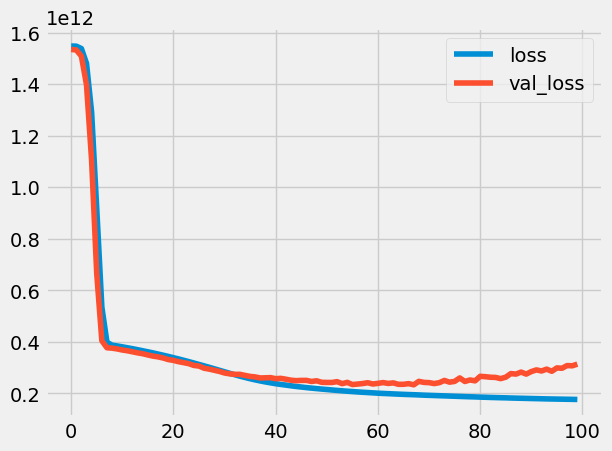

In [48]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions = model.predict(X_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(explained_variance_score(y_test,predictions))

93/93 [==============================] - 0s 2ms/step
413689.3925358953
559621.9978931047
0.4613382285708777


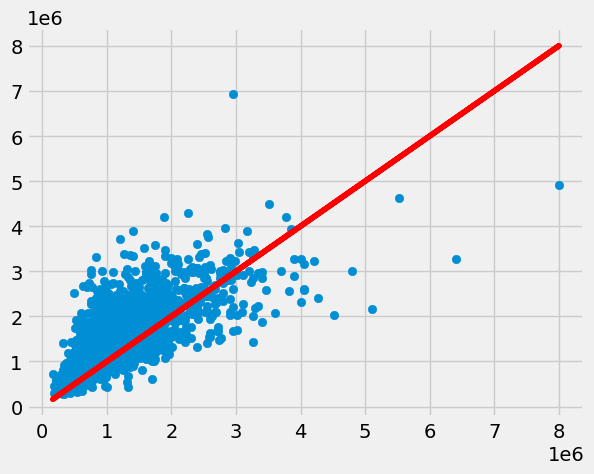

In [50]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [51]:
single_house = df.drop('Price',axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 20))
single_house

array([[0.        , 0.14285714, 0.5       , 0.25      , 0.08243728,
        0.03862661, 0.22222222, 0.14285714, 0.1       , 0.01174419,
        0.17119565, 0.96875   , 0.56623442, 0.46260542, 0.28571429,
        0.17073515, 0.        , 1.        , 0.05724726, 0.13636364]])

In [52]:
model.predict(single_house)

1/1 [==============================] - 0s 88ms/step


array([[1167687.2]], dtype=float32)

In [53]:
df.iloc[0]

Suburb           0.000000e+00
Rooms            2.000000e+00
Type             1.000000e+00
Price            1.480000e+06
Method           1.000000e+00
SellerG          2.300000e+01
Distance         2.500000e+00
Bedroom2         2.000000e+00
Bathroom         1.000000e+00
Car              1.000000e+00
Landsize         2.020000e+02
BuildingArea     1.260000e+02
CouncilArea      3.100000e+01
Lattitude       -3.779960e+01
Longtitude       1.449984e+02
Regionname       2.000000e+00
Propertycount    4.019000e+03
Year             2.016000e+03
Month            1.200000e+01
BuildingAge      5.400000e+01
TotalRooms       5.000000e+00
Name: 0, dtype: float64